In [3]:
from pfs.lam.detAnalysis import *
from pfs.lam.detFocusAnalysis import *
from pfs.lam.fileHandling import *
from pfs.lam.style import *
from pfs.lam.instrModelAlign import peakdet

In [17]:
from pfs.lam.opdb import getVisitRange

import lsst.daf.persistence as dafPersist

In [4]:
from astropy.convolution import Box2DKernel
from astropy.convolution import convolve

In [5]:
#%matplotlib widget

import matplotlib.pyplot as plt
#plt.style.use('dark_background')
from matplotlib import style
style.use('ggplot')

In [35]:
%matplotlib ipympl

In [90]:
doSavePlot = True

In [62]:
experimentId = 1344
rerun = "ginga/detrend"
cam = "b3"
extra = ''
basePath = '/drp/analysis/sm3/'
roi_size = 24
doBck = True
threshold = 0.

drpPath = "/data/drp"
repo = "sps"

In [63]:
arm = cam[0]
sm = int(cam[1])
print(arm, sm)

b 3


In [64]:
imgPath = basePath+"Exp"+str(experimentId)+"/"+rerun+"/roi"+str(roi_size)+"/doBck"+str(doBck)+"/"

In [65]:
print(imgPath)
if not os.path.exists(imgPath):
    os.makedirs(imgPath,exist_ok =True)

/drp/analysis/sm3/Exp1344/ginga/detrend/roi24/doBckTrue/


In [66]:
visitStart, visitEnd = getVisitRange(experimentId)
visit = int(visitStart)

In [67]:
specId = int(cam[1])
dataId = dict(arm=arm, spectrograph=specId)

In [68]:
repoRoot = f"{drpPath}/{repo}"
print(repoRoot)
print(os.path.join(repoRoot,  "rerun", rerun))
print(os.path.join(repoRoot, "CALIB"))

butler = dafPersist.Butler( os.path.join(repoRoot, "rerun", rerun), \
                           calibRoot=os.path.join(repoRoot, "CALIB"))
#butler.getKeys('raw')


/data/drp/sps
/data/drp/sps/rerun/ginga/detrend
/data/drp/sps/CALIB
lsst.CameraMapper INFO: Loading exposure registry from /data/drp/sps/registry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /data/drp/sps/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /data/drp/sps/CALIB/calibRegistry.sqlite3


In [69]:
plotfile = f"SM1_lightleakage_{cam}_Exp{experimentId}_{visit}"

print(plotfile)

SM1_lightleakage_b3_Exp1344_39018


In [70]:
# get lamp used to filter the list of peaks
dataId.update(visit=int(visit))
lamps = butler.queryMetadata('raw', ['lamps'], dataId)
exptime = butler.queryMetadata('raw', ['exptime'], dataId)[0]
print(f"lamps used: {lamps}")
print(f"Exptime {exptime}s")

lamps used: ['']
Exptime 300.001s


In [71]:
calExp = butler.get("calexp", visit=visit, arm=cam[0])

In [72]:
data = calExp.image.array

In [73]:
plt.imshow(data)

In [74]:
print(filenames)

NameError: name 'filenames' is not defined

In [75]:
data.mean()
np.median(data)
from scipy import stats
stats.describe(data[0])

DescribeResult(nobs=4096, minmax=(-12.401091, 131.73224), mean=0.16818815, variance=21.680998, skewness=12.669443967156358, kurtosis=326.57411238410145)

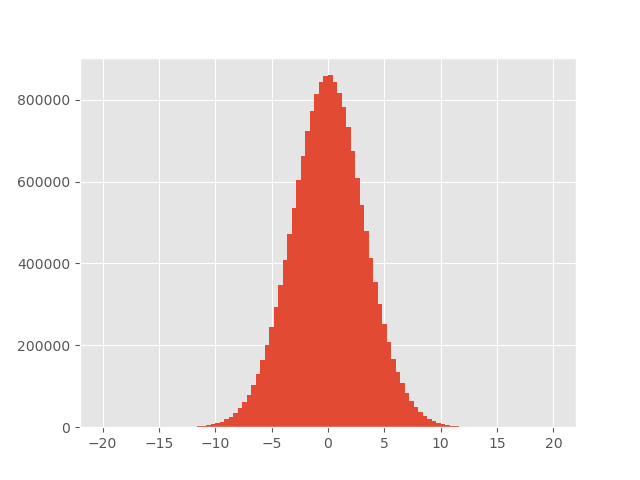

In [76]:
plt.figure()
histogram = plt.hist(data.ravel(), bins=100, range=(-20,20))

In [77]:
from astropy.stats import sigma_clip
filtered_data = sigma_clip(data, sigma=5, maxiters=3)

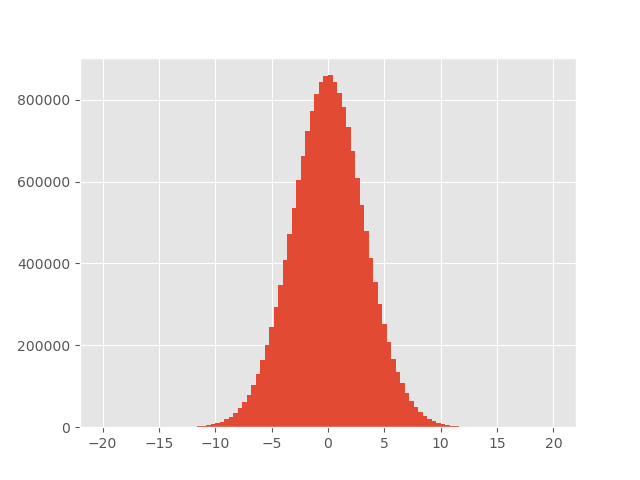

In [78]:
plt.figure()
histogram = plt.hist(filtered_data.flatten(), bins=100, range=(-20,20))

In [79]:
#carte de moyenne de 100pix de cote pour ne plus voir le bruit

In [80]:
exptime = getFitsKey(filenames,'exptime')
print(f"Exptime {exptime}s")

NameError: name 'filenames' is not defined

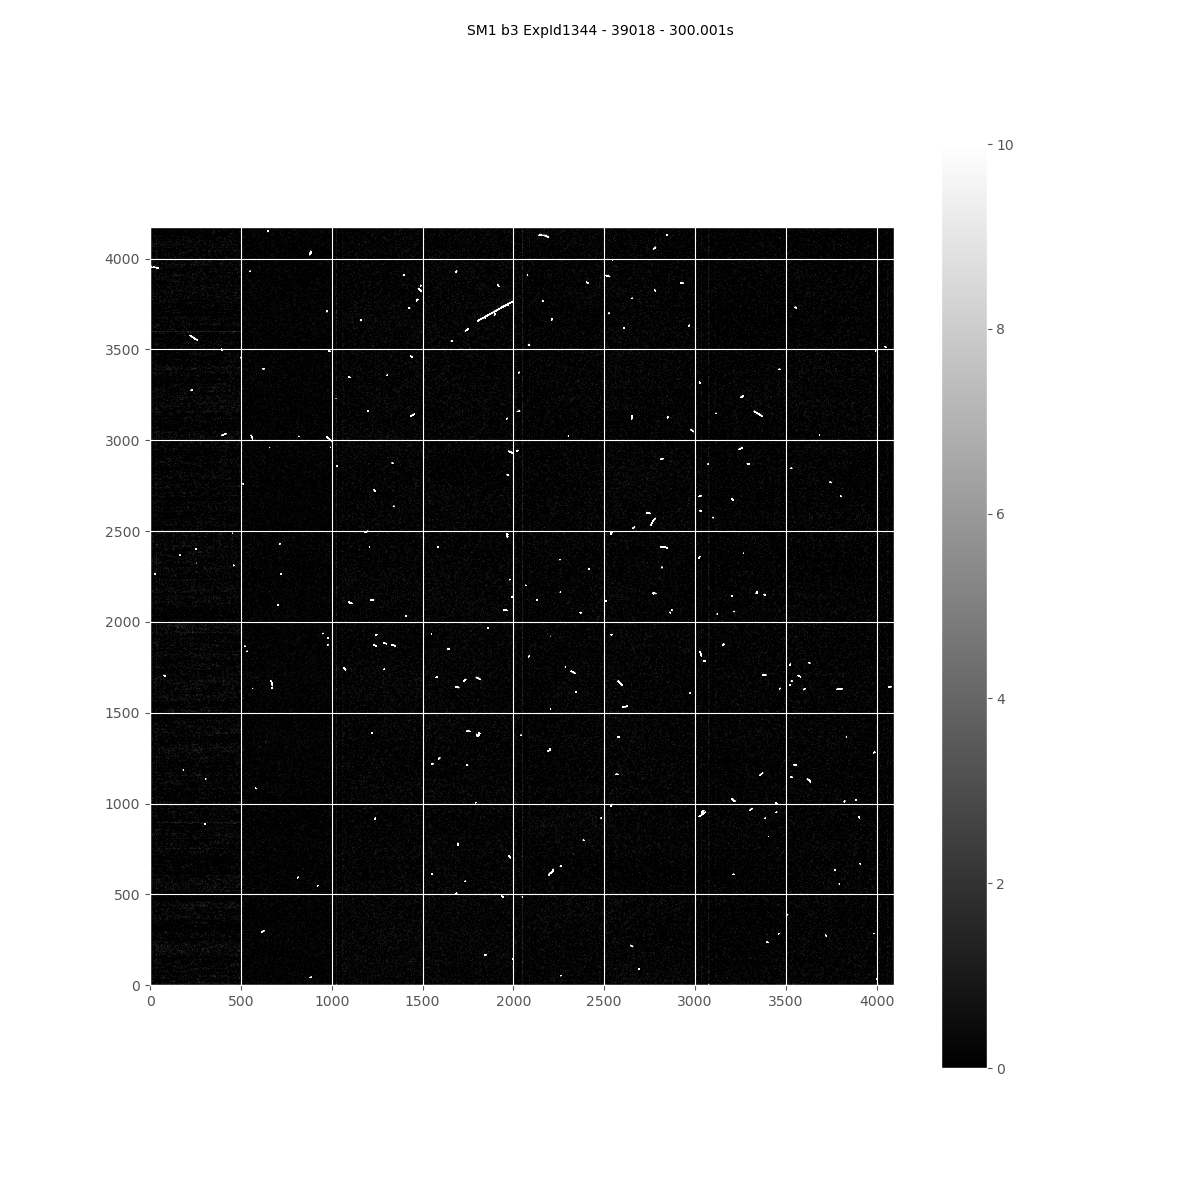

In [81]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot()
im = plt.imshow(data, origin='lower', cmap='gray', vmin=0, vmax=10)
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s', fontsize=10)
plt.colorbar()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"dark.png", bbox_inches = "tight")

#imgplot.set_clim(0.0, 0.7)
#a.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

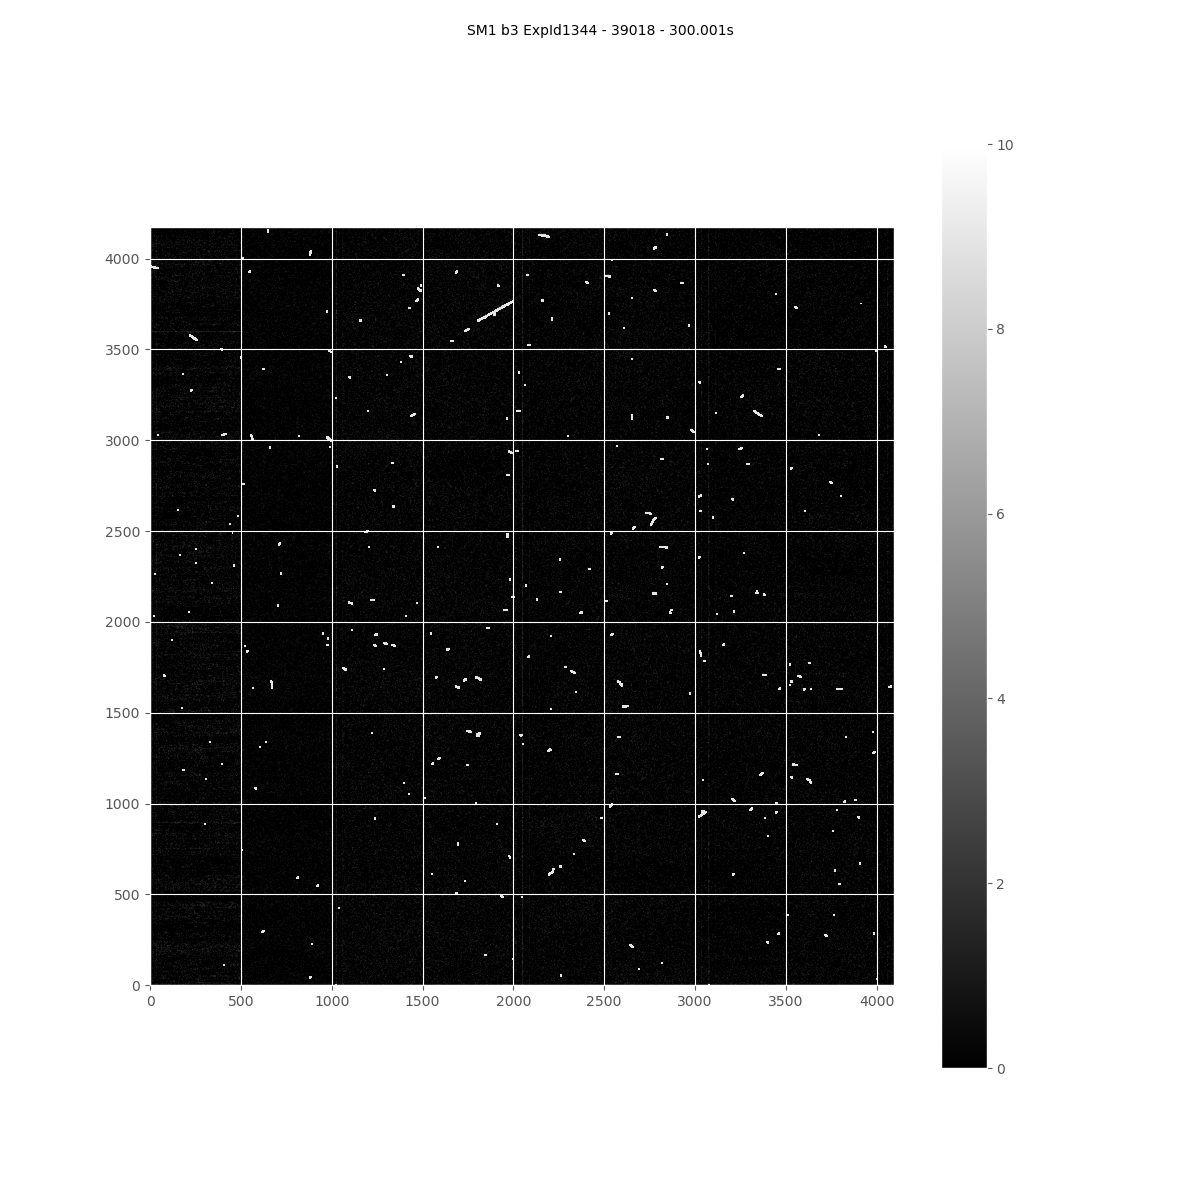

In [82]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot()
im = plt.imshow(filtered_data, origin='lower', cmap='gray', vmin=0, vmax=10)
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s', fontsize=10)
plt.colorbar()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"dark.png", bbox_inches = "tight")

#imgplot.set_clim(0.0, 0.7)
#a.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

In [83]:
kernel = Box2DKernel(100)

astropy_conv = convolve(filtered_data, kernel)

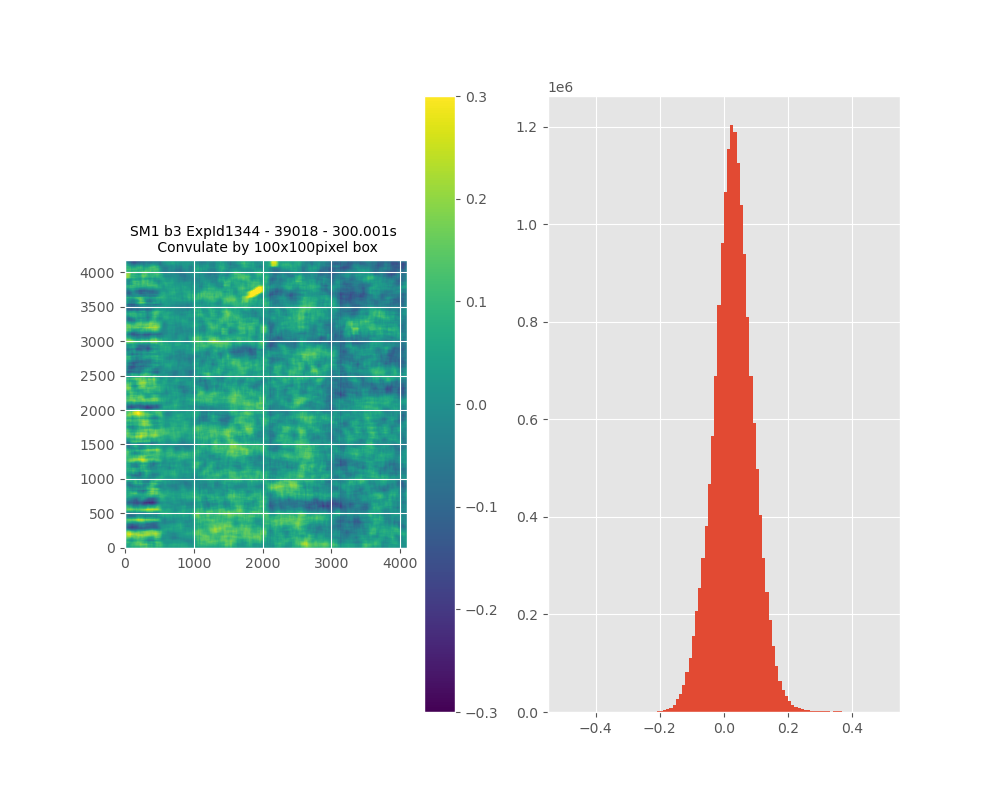

In [84]:
fig = plt.figure(figsize=(10, 8))
a = fig.add_subplot(1, 2, 1)
im = plt.imshow(astropy_conv, vmin=-0.3, vmax=0.3, origin='lower')
a.set_title(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s \n Convulate by 100x100pixel box', fontsize=10)
plt.colorbar()
a = fig.add_subplot(1, 2, 2)
imgplot = plt.hist(astropy_conv.ravel(), bins=100, range=(-0.5,0.5))
#imgplot.set_clim(0.0, 0.7)
#a.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

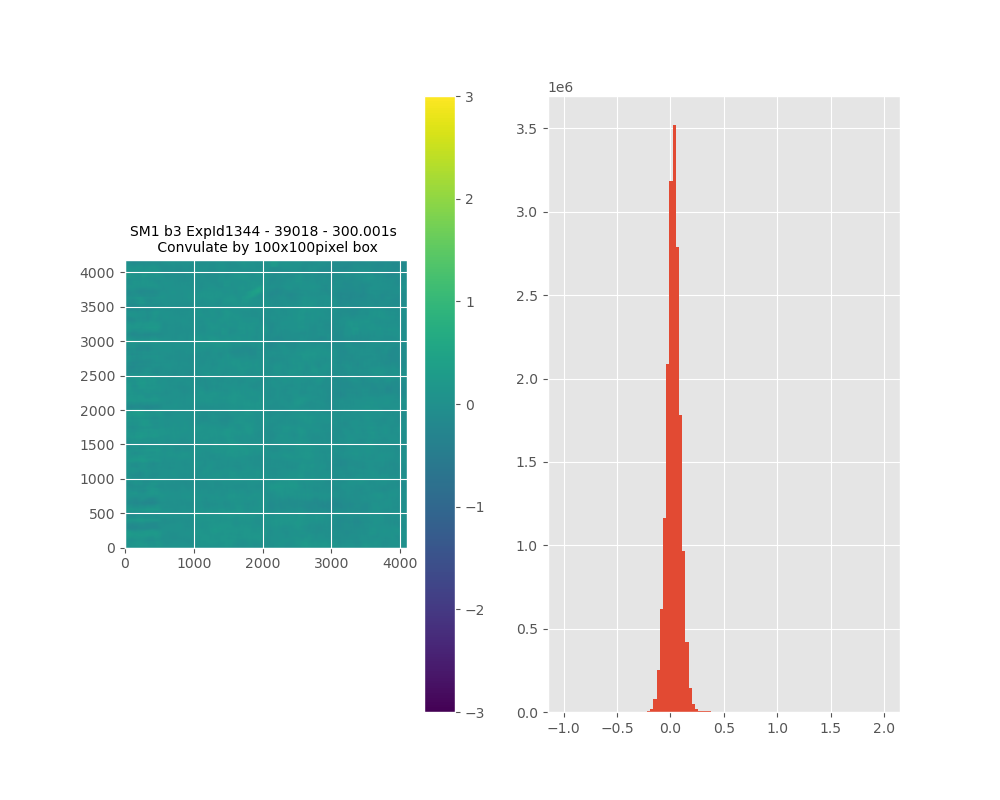

In [85]:
fig = plt.figure(figsize=(10, 8))
a = fig.add_subplot(1, 2, 1)
im = plt.imshow(astropy_conv, vmin=-3, vmax=3, origin='lower')
a.set_title(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s \n Convulate by 100x100pixel box', fontsize=10)
plt.colorbar()
a = fig.add_subplot(1, 2, 2)
imgplot = plt.hist(astropy_conv.ravel(), bins=100, range=(-1,2))
#imgplot.set_clim(0.0, 0.7)
#a.set_title('After')
#plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

/tmp/ipykernel_3330/414882078.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 8))


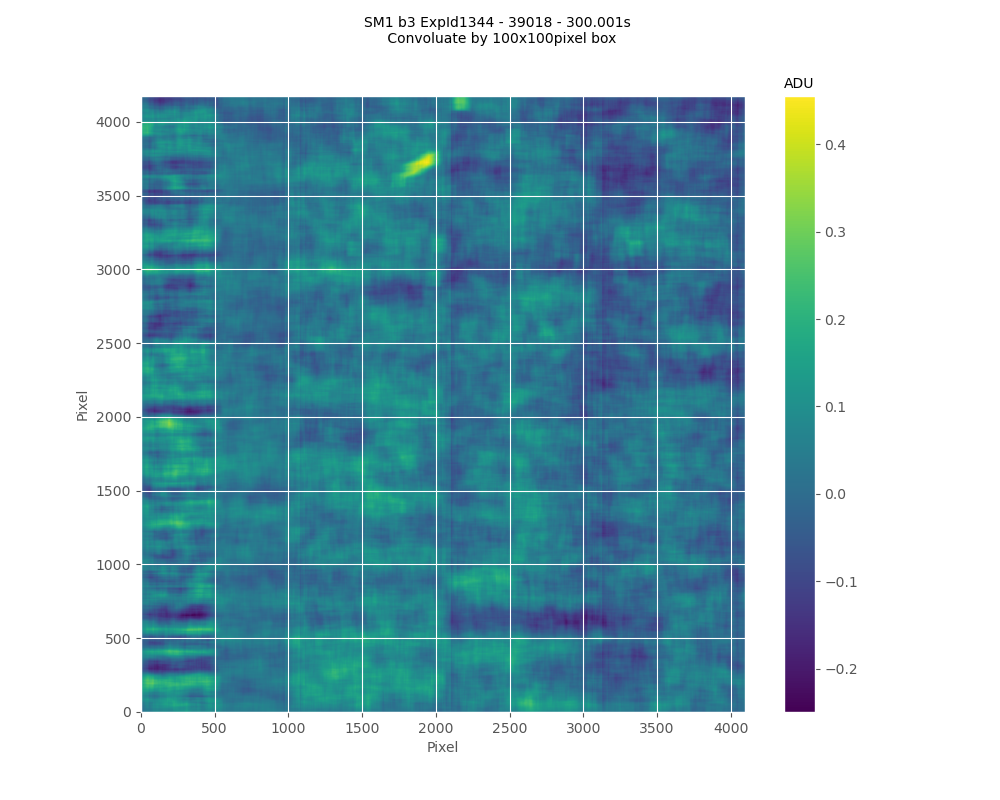

In [91]:
fig = plt.figure(figsize=(10, 8))
#im = plt.imshow(astropy_conv, vmin=-0.3, vmax=0.3, origin='lower')
im = plt.imshow(astropy_conv, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('ADU', fontsize=10)
#im = plt.imshow(astropy_conv, origin='lower')
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s \n Convoluate by 100x100pixel box', fontsize=10)
plt.xlabel('Pixel', fontsize=10)
plt.ylabel('Pixel', fontsize=10)

if doSavePlot:
    fig.savefig(imgPath+plotfile+".png")
#ax4.set_xticklabels([])
#ax4.set_yticklabels([])

In [ ]:
np.min(astropy_conv)

In [57]:
exptime

[300.001]

In [87]:
# 
exptime = float(exptime)
spec = 1*10**(-3) #photon/px/s
goal = 3*10**(-4) #photon/px/s

bgain = 1.2 if cam == "r1" else 1.4 #cam = b1
#exptime=600 #s

spec_adu = (spec*exptime)/bgain #ADU /px
goal_adu =  (goal*exptime)/bgain #ADU /px
print(f"spec {spec_adu} ADU/px")

spec 0.21428642857142854 ADU/px


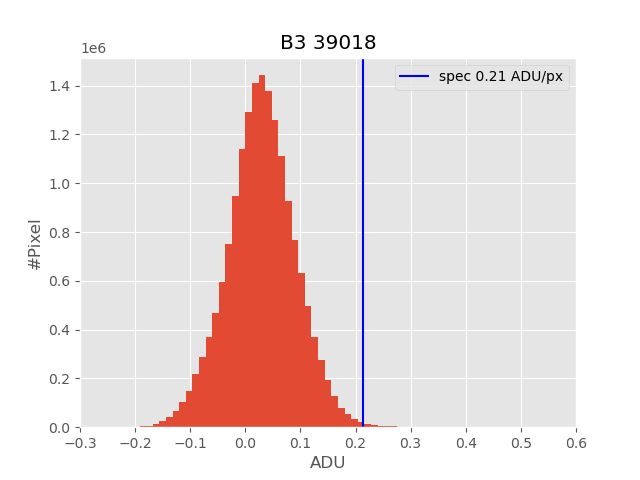

In [92]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100,range=(-0.6,0.6))
#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
#if cam == "b1" : 
#    plt.axvline(x=goal_adu,label=f"spec {goal_adu:.2f} ADU/px", c="blue", ls="--" )
plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title(cam.upper()+" " + str(visit))
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
plt.xlim(-0.3,0.6)
plt.legend()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"_Hist.png")

In [89]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100,range=(-0,1.6))
#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
if cam == "b1" : 
    plt.axvline(x=goal_adu,label=f"goal {goal_adu:.2f} ADU/px", c="blue", ls="--" )
plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title("Light leakage "+cam.upper()+" " + str(visit))
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
plt.xlim(-0,1.6)
plt.legend()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"_Hist.png")

In [ ]:
print(np.median(astropy_conv))
print(astropy_conv.mean())

In [ ]:
astropy_conv.mean()

In [ ]:
image_concat = []
for image in filelist.filepath:
    image_concat.append(fits.getdata(image))

In [ ]:
for image in image_concat:
    print(image.mean())

In [ ]:
ntot = filelist.filepath.count()
visit_start = filelist.visitId[0]
visit_end = filelist.visitId.iloc[-1]
print(f"nb Images {ntot} - visit {visit_start}..{visit_end}")

In [ ]:
final_image = np.zeros(shape=image_concat[0].shape)

for image in image_concat:
    final_image += image

final_image = final_image / tot

In [ ]:
np.medianian()

In [ ]:
from astropy.stats import sigma_clip
filtered_data = sigma_clip(data, sigma=2, maxiters=5)

In [ ]:
astropy_conv2 = convolve(final_image, kernel)

In [ ]:
fig = plt.figure()
#im = plt.imshow(astropy_conv, vmin=-0.3, vmax=0.3, origin='lower')
im = plt.imshow(astropy_conv2, origin='lower')

clb = plt.colorbar()
clb.ax.set_title('ADU', fontsize=10)
#im = plt.imshow(astropy_conv, origin='lower')
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {str(visit_start)}...{str(visit_end)} - {exptime}s \n Convoluate by 100x100pixel box', fontsize=10)
plt.xlabel('Pixel', fontsize=10)
plt.ylabel('Pixel', fontsize=10)
if doSavePlot:
    fig.savefig(imgPath+plotfile+"all.png", bbox_inches = "tight")
#ax4.set_xticklabels([])
#ax4.set_yticklabels([])

In [ ]:
show_goal = False

In [ ]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
n, bins, patches = plt.hist((astropy_conv2/ntot).ravel(), bins=100,range=(-0.2,0.5))
#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
if (cam == "b1") & show_goal : 
    plt.axvline(x=goal_adu,label=f"spec {goal_adu:.2f} ADU/px", c="blue", ls="--" )
    plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title(f"{cam.upper()}  {str(visit_start)}...{str(visit_end)} - {exptime}s")
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
plt.xlim(-0.1,0.5)
plt.legend()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"_Hist.png", bbox_inches = "tight")

In [ ]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
n, bins, patches = plt.hist((astropy_conv).ravel(), bins=100,range=(-0.6,0.6))
#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
if (cam == "b1") & show_goal : 
    plt.axvline(x=goal_adu,label=f"spec {goal_adu:.2f} ADU/px", c="blue", ls="--" )
    plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title(f"{cam.upper()}  {str(visit)} - {exptime}s")
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
plt.xlim(-0.3,0.6)
plt.legend()
if doSavePlot:
    fig.savefig(imgPath+plotfile+"_Hist.png", bbox_inches = "tight")

In [ ]:
print(f"Mean: {astropy_conv2.mean()/ntot}")
print(f"Median: {np.median(astropy_conv2)/ntot}")

In [ ]:
plt.figure()
#im = plt.imshow(astropy_conv, vmin=-2., vmax=2.e1, origin='lower')
im = plt.imshow(final_image,vmin=-0.5, vmax=0.5, origin='lower')

In [ ]:
print(f"Mean: {final_image.mean()/ntot}")
print(f"Median: {np.median(final_image)/ntot}")

In [ ]:
final_image.mean()/3

In [ ]:
summ = final_image.sum(axis=1)

In [ ]:
plt.figure()
plt.plot(summ)

In [ ]:
summ.mean()/4000/3

In [ ]:
medianFrame = np.median(image_concat, axis=0).astype(dtype=np.uint8)

In [ ]:
medianFrame = np.median(image_concat, axis=0)

In [ ]:
meanFrame = np.mean(image_concat, axis=0)

In [ ]:
fig = plt.figure()
#plt.hist(astropy_conv, range=(-0.5,0.5) )
#n, bins, patches = plt.hist(astropy_conv.ravel(), bins=100, density=True, facecolor='g', alpha=0.75,range=(-0.5,0.5))
#n, bins, patches = plt.hist((medianFrame).ravel(), bins=100,range=(-0.6,0.6))
n, bins, patches = plt.hist((medianFrame).ravel(), bins=100)

#plt.vlines(x=spec_adu, ymin=0, ymax=n.max(), label="spec_adu")
plt.axvline(x=spec_adu, label=f"spec {spec_adu:.2f} ADU/px", c="blue" )
if (cam == "b1") & show_goal : 
    plt.axvline(x=goal_adu,label=f"spec {goal_adu:.2f} ADU/px", c="blue", ls="--" )
    plt.xlabel("ADU")
plt.ylabel("#Pixel")
plt.title(f"{cam.upper()}  {str(visit)} - {exptime}s")
#plt.text(-0.15, 600000, f'median {np.median(astropy_conv.ravel()):.2f} ADU')
#plt.xlim(-200,200)
plt.legend()
#fig.savefig(imgPath+plotfile+"_Hist.png", bbox_inches = "tight")

In [ ]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot()
im = plt.imshow(medianFrame, origin='lower', cmap='gray', vmin=0, vmax=10)
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - median - {exptime}s', fontsize=10, )
plt.colorbar()
#fig.savefig(imgPath+plotfile+"dark.png", bbox_inches = "tight")

In [ ]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot()
im = plt.imshow(meanFrame, origin='lower', cmap='gray', vmax=10)
fig.suptitle(f'SM1 {cam} ExpId{experimentId} - {visit} - {exptime}s', fontsize=10, )
plt.colorbar()
#fig.savefig(imgPath+plotfile+"dark.png", bbox_inches = "tight")

In [ ]:
fig.sup

In [ ]:
4.5